In [56]:
import numpy as np
from numpy.random import choice
import matplotlib.pyplot as plt
from collections import Counter
from itertools import count
from matplotlib.animation import FuncAnimation
import random
from itertools import count
import copy
%matplotlib notebook

In [57]:
class Brownian():
    """
    A Brownian motion class constructor
    """
    def __init__(self ,n, endpoint, diffusion_coefficient):
        assert (type(n)==int)
        assert (type(endpoint)==int or type(endpoint) == float)
        assert (type(diffusion_coefficient) == int or type(diffusion_coefficient) == float)

        self.n = n
        self.endpoint = endpoint
        self.diffusion_coefficient = diffusion_coefficient
        self.points = []
        self.normals = []
        self.t = 0
        self.depth = 0
        
    def reset(self):
        self.points = []
        self.normals = []
        self.t = 0
        self.depth = 0
        
    def set_normals(self, depth = 1, increase = False): # add dimensions attribute        
        for i in range(depth):
            increments = self.diffusion_coefficient*np.sqrt(self.t) * np.random.normal(size = self.n - 1)
            self.normals.append([0])
            self.normals[i].extend(np.cumsum(increments))
        
    def set_increments(self):
        self.points = np.linspace(0, self.endpoint, self.n, endpoint=True)
        self.t = self.points[1] - self.points[0]
        
    def set_depth(self, depth):
        self.depth = depth
        
    def three_d_graph(self):
        self.reset()
        self.set_increments()
        self.set_normals(2)
        
        fig2 = plt.figure()
        ax2 = plt.axes(projection='3d')
        
        zline = self.normals[1]
        xline = self.points
        yline = self.normals[0]
        ax2.plot3D(xline, yline, zline)
        
    def reflection_animation(self, asymptote):
        return Reflect(self, asymptote).set_up()
    
    def multidimensional_Brownian(self, depth):
        self.reset()
        self.set_depth(depth)
        self.set_increments()
        self.set_normals(depth)
        
        x = [list(x) for x in zip(*self.normals)]
        fig1 = plt.figure()
        ax1 = plt.axes()

        ax1.hlines(y=0, xmin=0, xmax=self.endpoint, linewidth=2, color='grey')
        ax1.plot(self.points, x)
        
        

In [58]:
class Reflect:
    """
    Animates the brownian motion reflection principle
    """
    def __init__(self ,obj, asymptote):
        obj.reset()
        obj.set_increments()
        obj.set_normals()
        self.__dict__.update(obj.__dict__)
        self.x = self.normals[0]
        self.asymptote = asymptote

    def set_up(self):
        fig, axes = plt.subplots()
        plt.axhline(0, color = 'grey')
        plt.hlines(y = self.asymptote, xmin = 0, xmax = self.endpoint, label='x')
        x1,x2,y1,y2 = [],[],[],[]
        first_hit = next((j for j in self.x if j >= self.asymptote), None)

        hit = False
        if first_hit != None:
            hit = True
            hit_index = self.x.index(first_hit)

            #linear interpolation to make reflection point seem continuous
            slope = (self.x[hit_index] - self.x[hit_index - 1])
            increase_needed = self.asymptote - self.x[hit_index - 1]
            hitting_time = float((increase_needed/slope) * self.t) + self.points[hit_index ]
            plt.vlines(x = hitting_time, ymax = self.asymptote, ymin = 0, linestyles='dashed')

            x2.append(hitting_time)
            y2.append(self.asymptote)

        peak = max(max(self.x) + abs(self.asymptote), abs(min(self.x)) + abs(self.asymptote))
        axes.set_ylim(-peak, peak)
        axes.set_xlim(0, self.endpoint)
        myvar = count(0, self.t)

        def animate(i):
            next_index = next(myvar)
            x1.append(next_index)
            y1.append((self.x[i]))
            axes.plot(x1, y1, color="red")

            if hit == True and i >= hit_index:
                axes.plot(x2, y2, color="blue")
                x2.append(next_index)
                y2.append(2*self.asymptote - self.x[i])
                
        anim = FuncAnimation(fig, animate, interval=self.endpoint, blit = True)
        return anim

In [15]:
def liveplot(*objects):
    #pp = ProgressPlot(x_iterator=False, x_lim=[0, objects[0].endpoint], y_lim=[-3, 3])
    for obj in objects:
        obj.set_increments()
        obj.set_normals()

    for obj in objects:
        #for j in range(obj.n):
        x = [list(x) for x in zip(*obj.normals)]
        plt.plot(obj.points, x)
            #pp.update(obj.points[j], obj.normals[j])
    plt.axhline(0, color = 'grey')
    plt.show()
    #pp.finalize()

# Declaring a Brownian Process 

This Brownian process will have 1000 equally spaced points over an interval of [0,1] with a diffusion coefficient of 1, i.e. $a$ is a standard Brownian motion with each independent interval following a Normal with paramters $\sigma^2 = t$, $\mu = 0$

All the brownian motions below start at $x_0 = 0$

In [59]:
a = Brownian(1000,1,1)

Here we plot Brownian motion $a$ as well as another Brownian $b$, for which each independent interval follows a Normal with paramters $\sigma^2 = 4t$ and $\mu = 0$

<IPython.core.display.Javascript object>


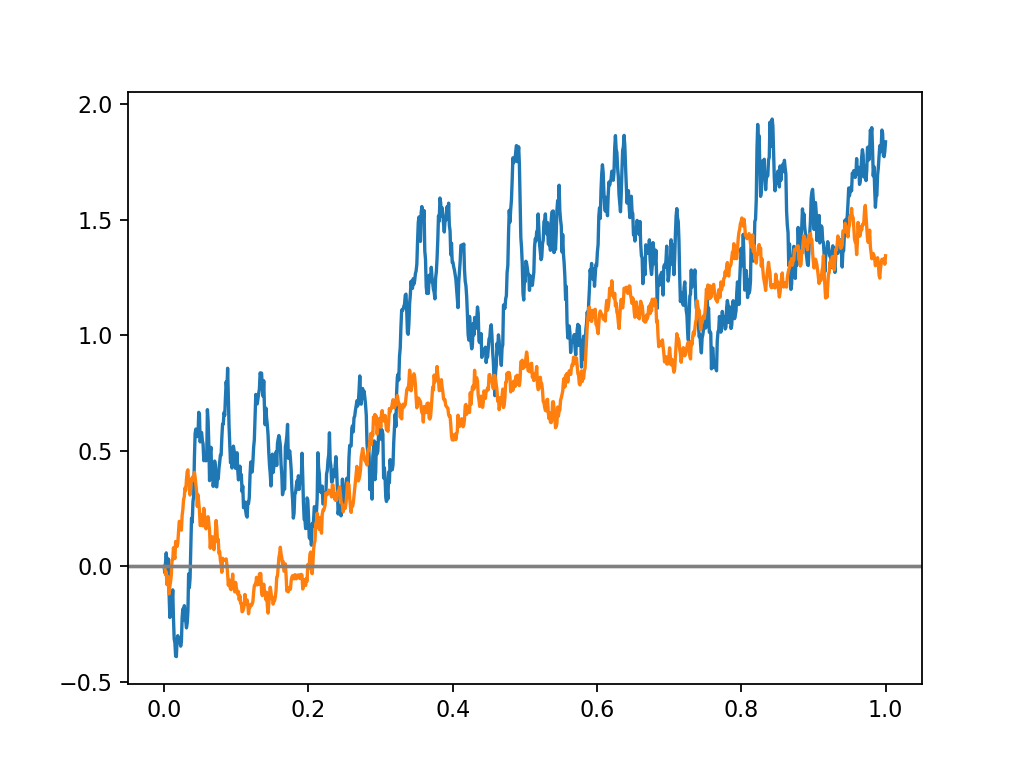

In [18]:
b = Brownian(1000,1,2)
liveplot(b,a)

# Reflection Principle

This next cell provides for a simulation of the the reflection principle for an asymptote of the user's choice. 

Here we use an asymptote of $5$, that can be used to estimate the probabilty that the given process will cross that asymptote for any given interval $[0,t]$ for $0 < t < 1$


<IPython.core.display.Javascript object>


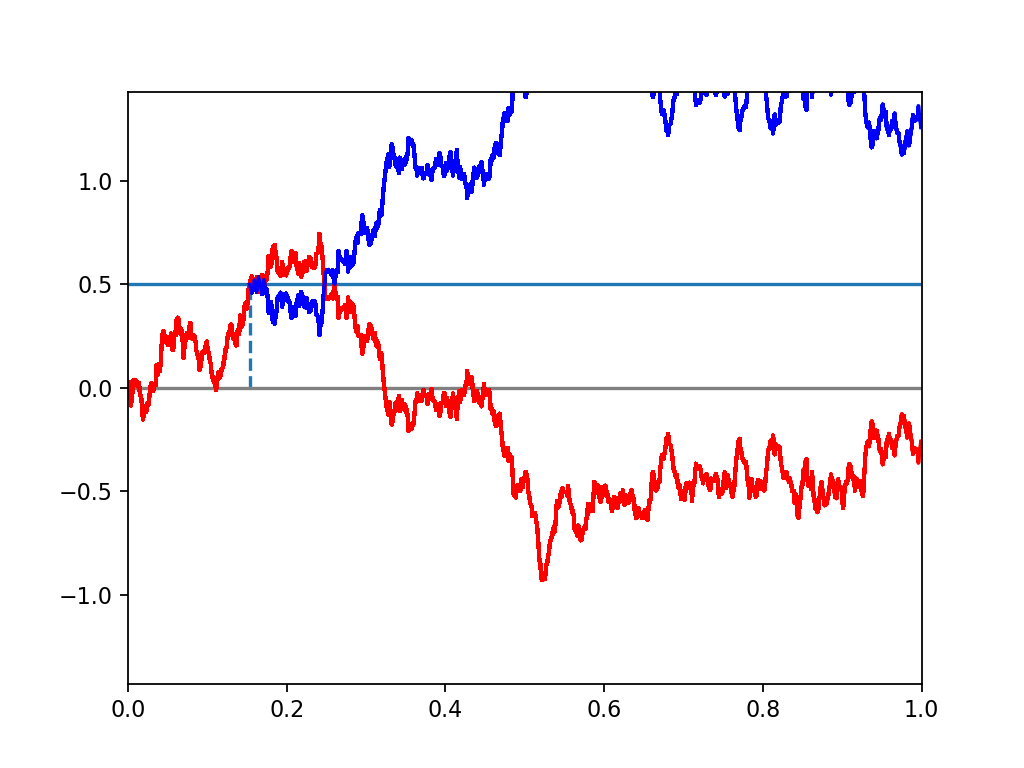

In [61]:
plot = a.reflection_animation(.5)

# Multidimensional Brownian motion

Here we simply observe the emerging pattern when overlaying up to a $1000$ randomly generated instances of Brownian Motion $a$

<IPython.core.display.Javascript object>


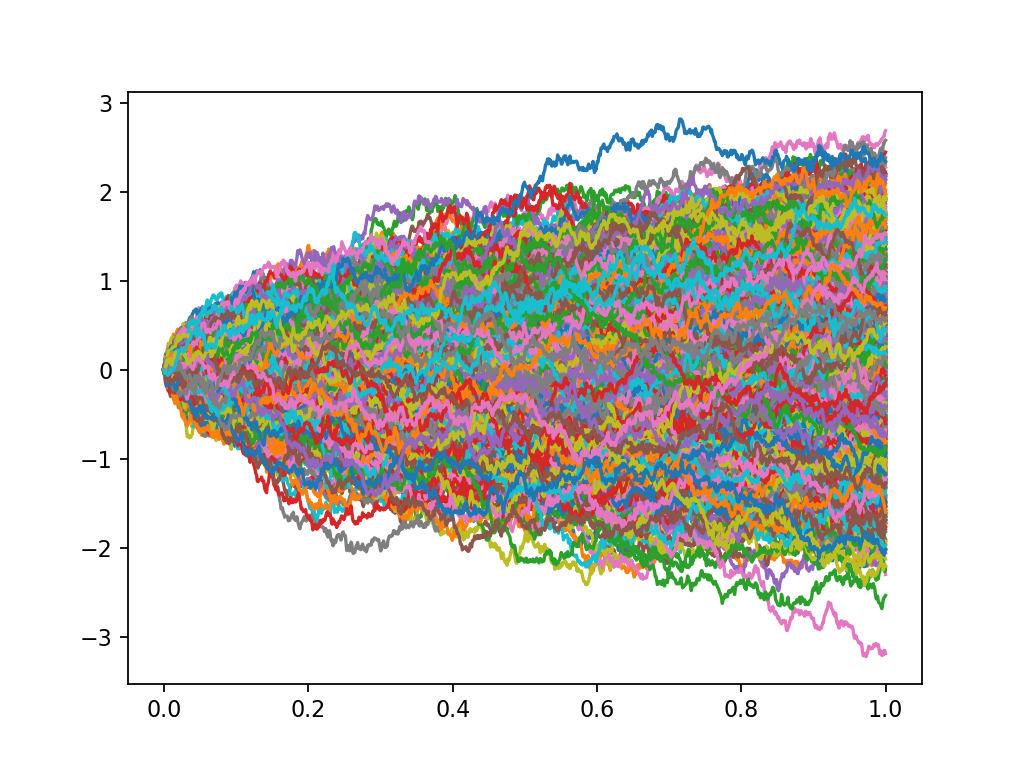

In [45]:
a.multidimensional_Brownian(1000)

# Visualizing in 3 Dimensions
Here we have an interactive 3D graph of a Brownian motion. 

<IPython.core.display.Javascript object>


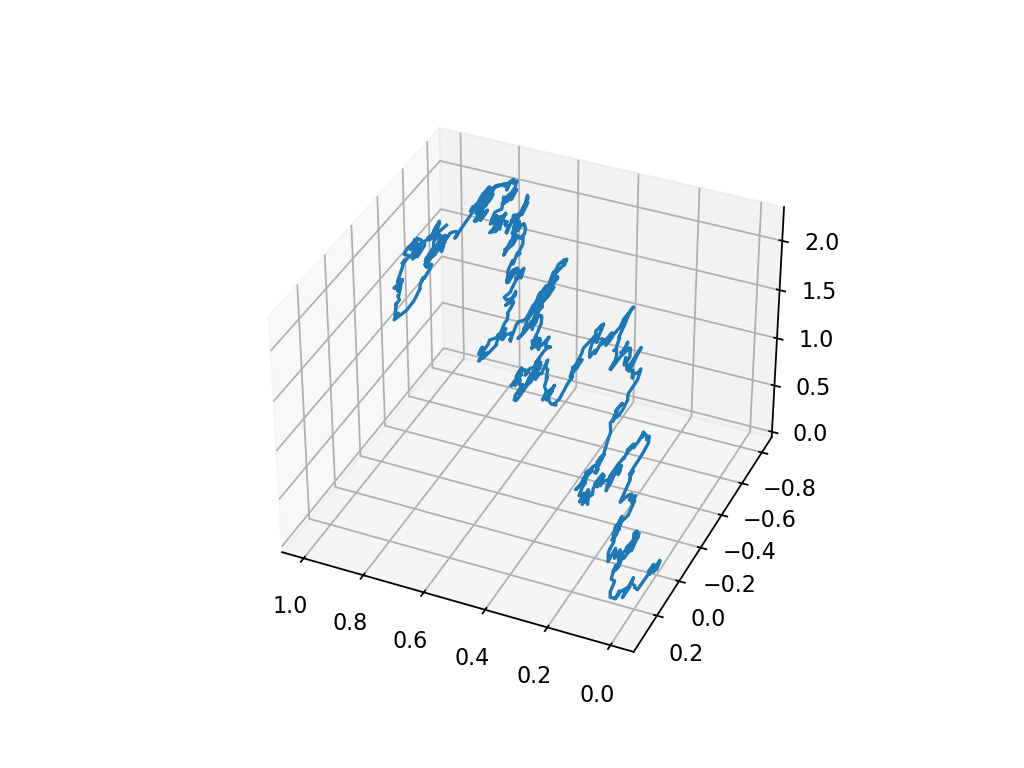

In [46]:
a.three_d_graph()